In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd


In [9]:
df = pd.read_csv('./data/경기도/원본/지역화폐 가맹점_20240331.csv',encoding='cp949')
df

,시군명,상호명,업종명(종목명),소재지도로명주소,소재지지번주소,우편번호,위도,경도,사업자등록번호,업종코드,가맹점번호,휴폐업상태,휴폐업상태코드,폐업일자,데이터기준일자
0,고양시,까망노래연습장,노래방,경기도 고양시 일산동구 탄중로 322,"경기도 고양시 일산동구 중산동 1570-3번지 고봉프라자 201,202호",10333.0,37.693153,126.780748,102-30-07121,8402,979093887,NaN,NaN,NaN,20240331
1,고양시,일산좋은치과의원,치과,경기도 고양시 일산동구 일산로 441,경기도 고양시 일산동구 정발산동 1204번지 일성조합상가 3층 301호,10359.0,37.673089,126.777688,160-97-00108,4201,979091022,NaN,NaN,NaN,20240331
2,고양시,잉크존,"문구,사무용품",경기도 고양시 일산서구 중앙로 1388,경기도 고양시 일산서구 주엽동 73번지 강선마을11단지아파트 지하1층 28호,10366.0,37.668358,126.766100,660-03-00201,8102,979075504,NaN,NaN,NaN,20240331
3,고양시,참좋은집,오양.보육.복지시설,경기도 고양시 일산동구 고봉로770번길 211-1,경기도 고양시 일산동구 성석동 1061-40번지,10252.0,37.717316,126.796933,815-80-00122,7301,976706432,NaN,NaN,NaN,20240331
4,고양시,(주)팩토리빈,커피전문점,경기도 고양시 일산동구 멱절길 368-104,경기도 고양시 일산동구 장항동 671-9번지 1층,10397.0,37.650748,126.760605,463-81-00044,2502,976704676,NaN,NaN,NaN,20240331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418745,화성시,킹(KING),차량부품.용품,경기도 화성시 융건로 9,경기도 화성시 기안동 457-712번지 1층 101호,18343.0,37.214169,126.981810,283-05-02267,6501,912458248,NaN,NaN,NaN,20240331
418746,화성시,아리가또맘마 중동탄점,일식전문점,경기도 화성시 동탄대로14길 5-25,경기도 화성시 오산동 1030-12번지 1동 1층 101호,18486.0,37.185485,127.102669,324-24-00746,2303,911329093,NaN,NaN,NaN,20240331
418747,화성시,아이티씨영어,기타교육.교습.학원,경기도 화성시 서동탄로 53,경기도 화성시 능동 1282번지 서동탄역파크자이 108동 1001호,18416.0,37.202864,127.049760,825-95-00424,7213,900649832,NaN,NaN,NaN,20240331
418748,화성시,다함 목재,기타건축자재,경기도 화성시 비봉면 현대기아로 840,경기도 화성시 비봉면 양노리 714-42번지 1층,18284.0,37.222404,126.859343,827-08-01676,3403,904958213,NaN,NaN,NaN,20240331


In [25]:
# 데이터 정제1. 휴업, 폐업 가맹점 제외

df = df[df['휴폐업상태코드'].isna() | (df['휴폐업상태코드'] == 1)]

In [27]:
# 데이터 정제2. 필요없는 컬럼 제거

temp1=df.drop(['상호명', '사업자등록번호','업종코드','가맹점번호','소재지도로명주소', '소재지지번주소', '우편번호', '위도', '경도', '데이터기준일자','휴폐업상태','휴폐업상태코드','폐업일자' ], axis=1)
temp1

,시군명,업종명(종목명)
0,고양시,노래방
1,고양시,치과
2,고양시,"문구,사무용품"
3,고양시,오양.보육.복지시설
4,고양시,커피전문점
...,...,...
418745,화성시,차량부품.용품
418746,화성시,일식전문점
418747,화성시,기타교육.교습.학원
418748,화성시,기타건축자재


In [30]:
temp1.rename(columns={'업종명(종목명)':'업종'},inplace=True)
temp1

,시군명,업종
0,고양시,노래방
1,고양시,치과
2,고양시,"문구,사무용품"
3,고양시,오양.보육.복지시설
4,고양시,커피전문점
...,...,...
418745,화성시,차량부품.용품
418746,화성시,일식전문점
418747,화성시,기타교육.교습.학원
418748,화성시,기타건축자재


In [32]:
# 데이터 정제3. 업종에 '기타' 항목 제거

idx = temp1[temp1['업종'] == '기타'].index
df_new = temp1.drop(idx)
df_new

,시군명,업종
0,고양시,노래방
1,고양시,치과
2,고양시,"문구,사무용품"
3,고양시,오양.보육.복지시설
4,고양시,커피전문점
...,...,...
418745,화성시,차량부품.용품
418746,화성시,일식전문점
418747,화성시,기타교육.교습.학원
418748,화성시,기타건축자재


In [33]:
## 시각화 설정

from matplotlib import pyplot as plt
import seaborn as sns

# matplotlib 설정하기
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use("ggplot")

In [34]:
# 전체 업종별 가맹점 수 확인

df_type=df_new.groupby(['업종']).count() #각 업종별 가맹점 수 구하기
df_type

,시군명
업종,
가구판매점,1810
가발,108
가방.핸드백,233
가전/통신,534
가전제품,461
...,...
호텔(특급),5
호텔(특급외),128
화방.표구점,56


In [36]:
df_type2=df_type.rename(columns={'시군명':'shop_cnt'}) 
df_type3 = df_type2.reset_index()
df_type4 = df_type3.rename(columns={'업종':'category'})
df_type4

,category,shop_cnt
0,가구판매점,1810
1,가발,108
2,가방.핸드백,233
3,가전/통신,534
4,가전제품,461
...,...,...
214,호텔(특급),5
215,호텔(특급외),128
216,화방.표구점,56
217,화원.화초,3369


In [37]:
# 업종별 점포 수의 비율

df_type4['shop_rate'] = df_type4['shop_cnt'] / df_type4['shop_cnt'].sum()*100
df_type4

,category,shop_cnt,shop_rate
0,가구판매점,1810,0.453862
1,가발,108,0.027081
2,가방.핸드백,233,0.058425
3,가전/통신,534,0.133902
4,가전제품,461,0.115597
...,...,...,...
214,호텔(특급),5,0.001254
215,호텔(특급외),128,0.032096
216,화방.표구점,56,0.014042
217,화원.화초,3369,0.844784


In [38]:
frame1 = df_type4.sort_values(by="shop_rate", ascending=False)
frame1

,category,shop_cnt,shop_rate
150,일반음식점,98984,24.820461
72,미용실(두발전문),19419,4.869358
24,기타교육.교습.학원,18783,4.709880
195,커피전문점,13820,3.465396
204,편의점,12307,3.086008
...,...,...,...
212,항공사,1,0.000251
29,기타보험,1,0.000251
133,우편요금,1,0.000251
156,자동차(수입신차),1,0.000251


In [39]:
frame2 = df_type4.sort_values(by='shop_rate', ascending=False).head(25)

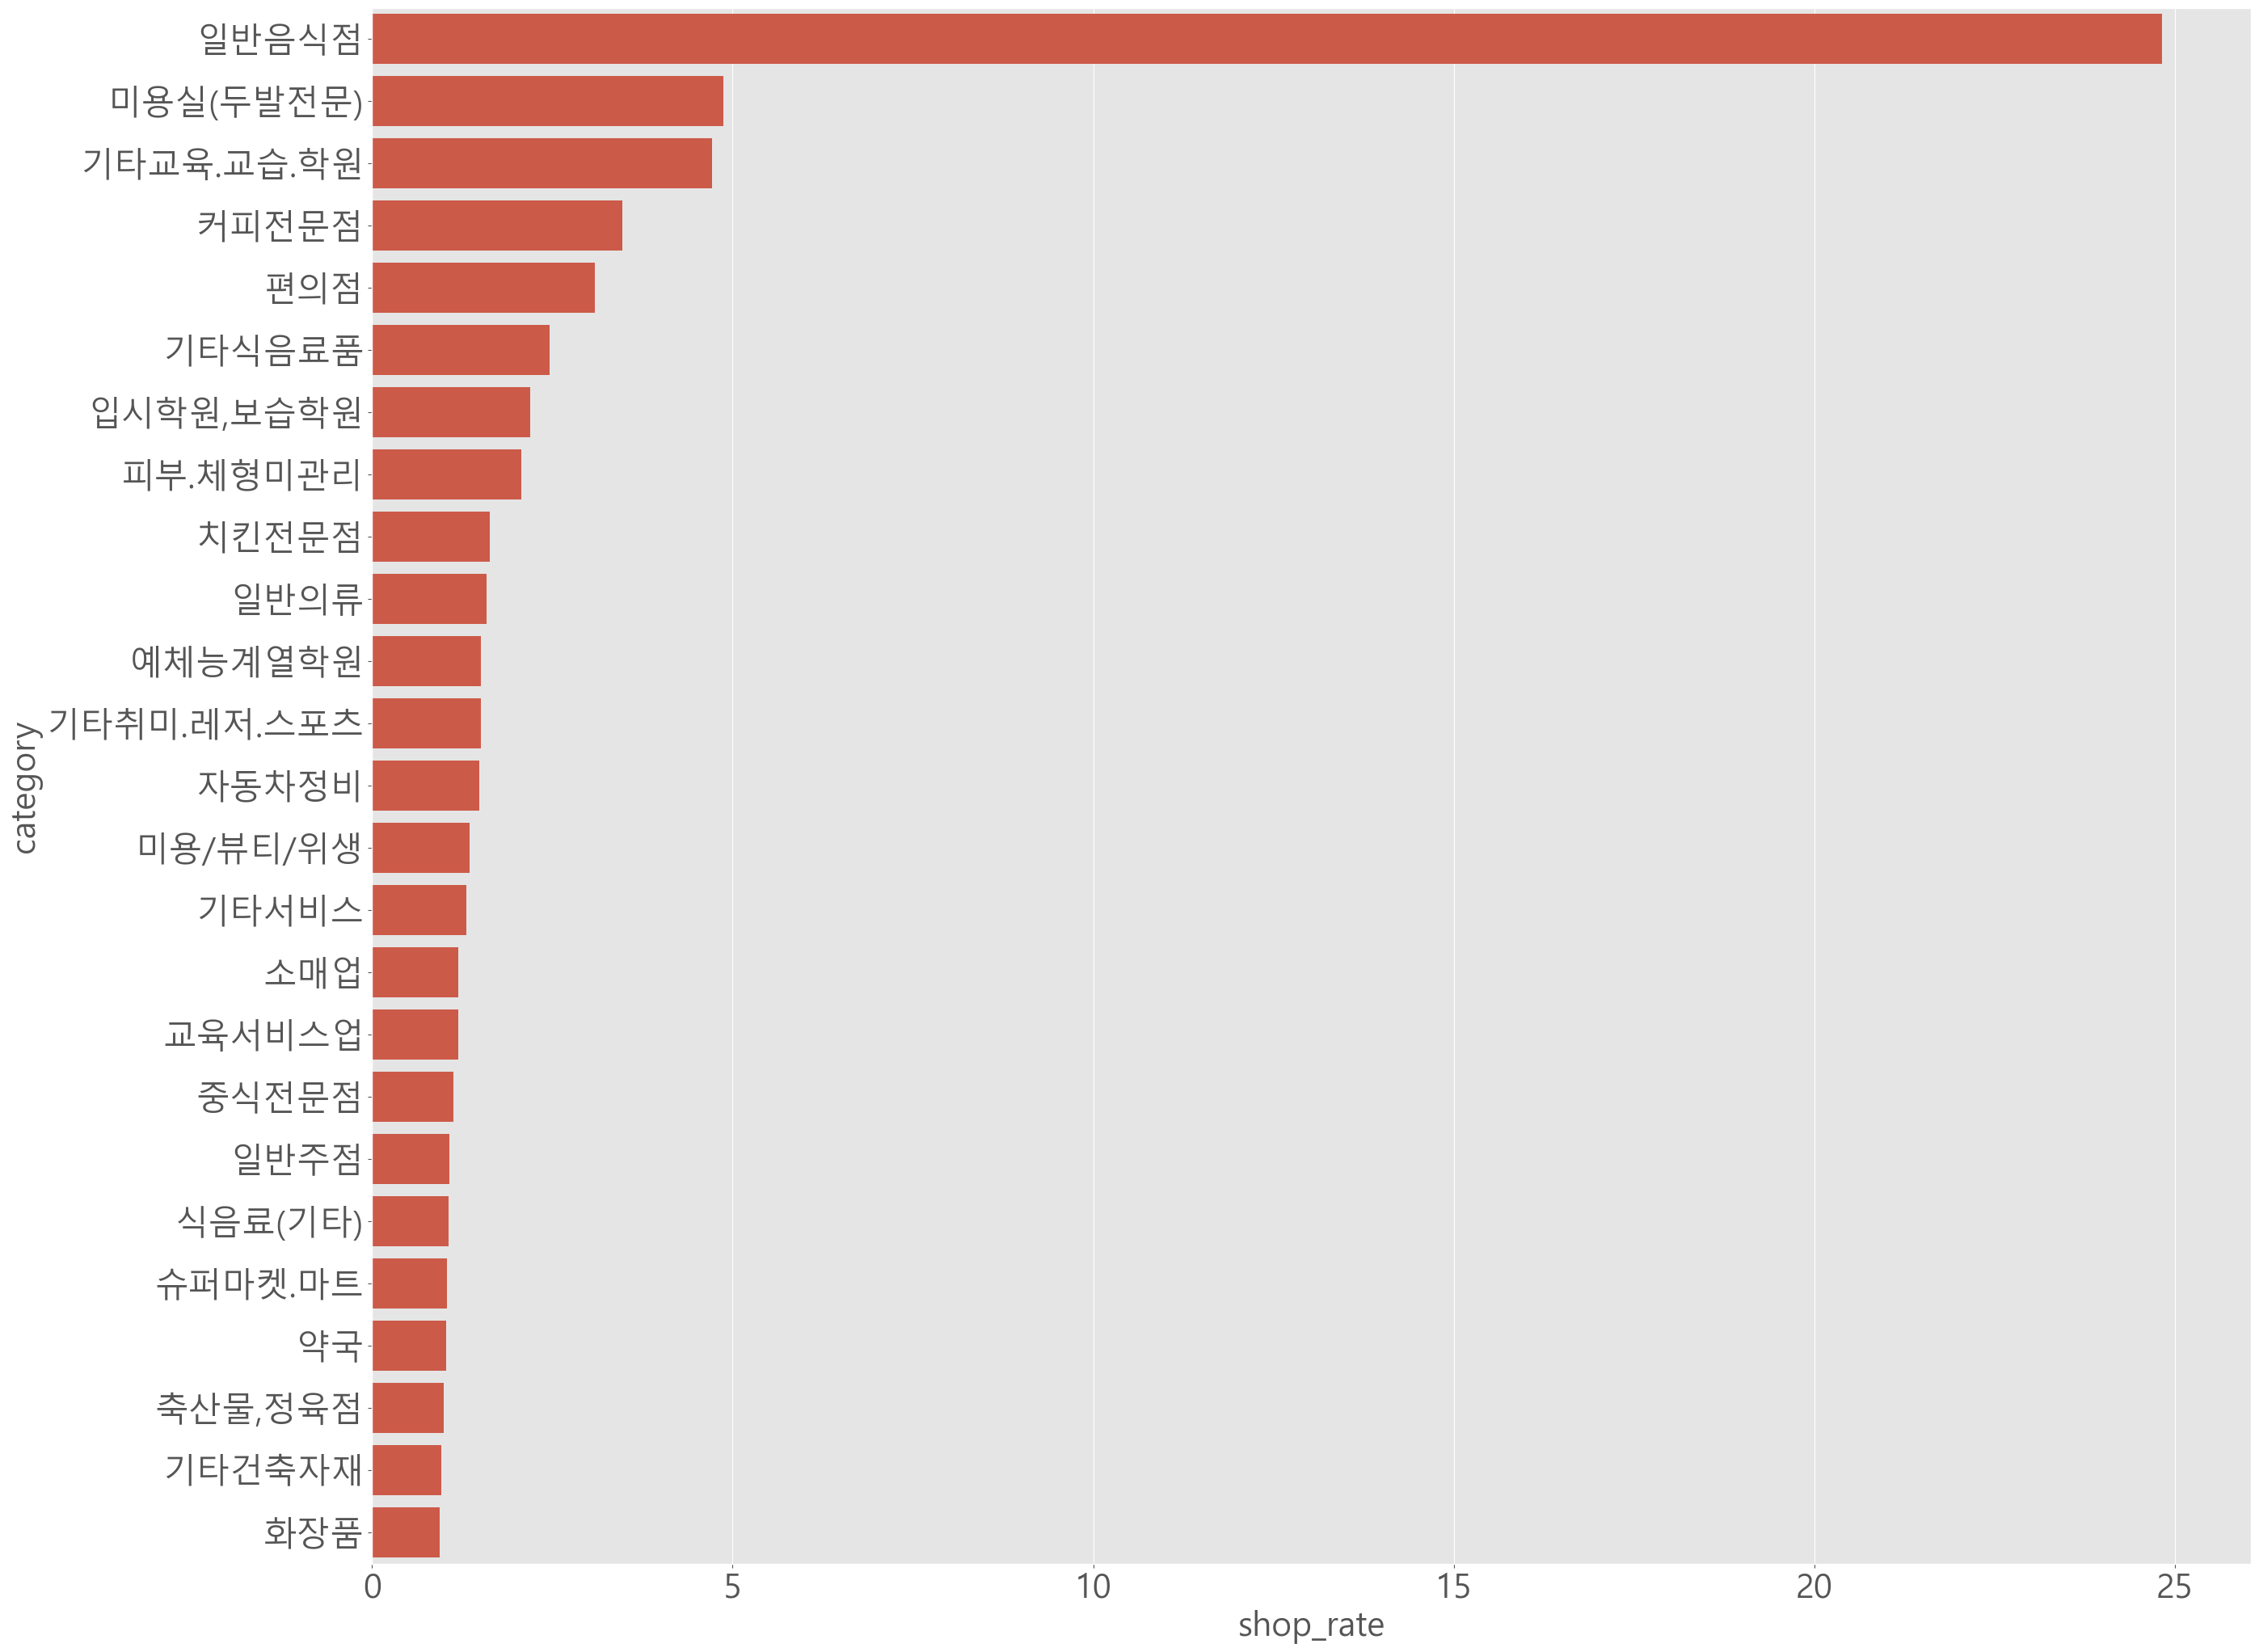

In [50]:
plt.figure(figsize=(30,25))  
plt.rc('font', size=20)
plt.rc('axes', labelsize=30)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=30)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=30)  # y축 눈금 폰트 크기
plt.xticks(rotation = 0 )
sns.barplot(data=frame2, x="shop_rate", y="category") 
plt.show()